In [2]:
import geodatasets
import plotly.express as px
import pandas as pd
import altair as alt
import geopandas as gpd

In [3]:
parks_combined = pd.read_csv("parks_combined.csv")

In [4]:
parks_combined.columns

Index(['Park Code', 'Park Name', 'Category', 'Category Sort', 'Order',
       'Family', 'Taxon Code', 'TSN', 'Taxon Record Status', 'Scientific Name',
       'Common Names', 'Synonyms', 'Park Accepted', 'Sens?', 'Record Status',
       'Occurrence', 'Nativeness', 'Abundance', 'NPS Tags', 'References',
       'Observations', 'Vouchers', 'T&E', 'State Status', 'GRank', 'SRank'],
      dtype='object')

In [5]:
import altair as alt

park_name_select = alt.selection_point(
    fields=['Park Name'],
    bind=alt.binding_radio(
        options=parks_combined['Park Name'].dropna().unique().tolist(),
        name='Select Park: '
    ),
    empty=False
)

highlight = alt.selection_point(fields=['Family'], empty=False)

chart = alt.Chart(parks_combined).mark_bar(size=100).encode(
    x=alt.X(
        'Abundance:N',
        title='Abundance',
        sort=['Abundant', 'Common', 'Uncommon', 'Rare', 'Unknown']
    ),
    y=alt.Y(
        'Nativeness:N',
        title='Nativeness',
        sort=['Native', 'Non-native', 'Unknown']
    ),
    color=alt.condition(
        park_name_select,
        alt.Color(
            'Park Name:N',
            legend=alt.Legend(title="Park Name"),
            scale=alt.Scale(scheme='tableau20')
        ),
        alt.value('lightgray')
    ),
    tooltip=[
        alt.Tooltip('Park Name:N', title='Park Name'),
        alt.Tooltip('Family:N', title='Family'),
        alt.Tooltip('Abundance:N', title='Abundance'),
        alt.Tooltip('Nativeness:N', title='Nativeness')
    ]
).add_params(
    park_name_select, highlight
).properties(
    width=800,
    height=500,
    title="Species Nativeness and Abundance Across Parks"
)

chart


alt.Chart(...)

In [6]:
# Heatmap
heatmap = alt.Chart(parks_combined).mark_rect().encode(
    x=alt.X('Abundance:N', title='Abundance'),
    y=alt.Y('Nativeness:N', title='Nativeness'),
    color=alt.Color('count():Q', title='Number of Species', scale=alt.Scale(scheme='blues')),
    tooltip=[
        alt.Tooltip('Abundance:N', title='Abundance'),
        alt.Tooltip('Nativeness:N', title='Nativeness'),
        alt.Tooltip('count():Q', title='Number of Species')
    ]
).properties(
    width=400,
    height=300,
    title="Heatmap of Species Count by Abundance and Nativeness"
)

heatmap


alt.Chart(...)

In [11]:
# Define a single selection for the radio buttons
park_name_selection = alt.selection_point(
    fields=['Park Name'],
    bind=alt.binding_radio(
        name='Select Park: ',
        options=parks_combined['Park Name'].unique().tolist()
    ),
    value=[{'Park Name': parks_combined['Park Name'].iloc[0]}]  # Initial value as an array of one dictionary
)

# Heatmap with selection
heatmap = alt.Chart(parks_combined).mark_rect().encode(
    x=alt.X('Abundance:N', title='Abundance'),
    y=alt.Y('Nativeness:N', title='Nativeness'),
    color=alt.Color('count():Q', title='Number of Species', scale=alt.Scale(scheme='blues')),
    tooltip=[
        alt.Tooltip('Abundance:N', title='Abundance'),
        alt.Tooltip('Nativeness:N', title='Nativeness'),
        alt.Tooltip('count():Q', title='Number of Species')
    ]
).properties(
    width=400,
    height=300,
    title="Heatmap of Species Count by Abundance and Nativeness"
).add_selection(
    park_name_selection
).transform_filter(
    park_name_selection
)

heatmap
heatmap.save('heatmap.html')


/var/folders/_m/w66l765131l8253_28x9bp400000gp/T/ipykernel_8467/721995538.py:25: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  ).add_selection(


In [113]:
import pandas as pd

# Calculate the average count for each Nativeness category by Park Name
avg_count_by_nativeness = parks_combined.groupby(['Park Name', 'Nativeness']).size().reset_index(name='Count')

# Calculate the average counts by Park Name and Nativeness
avg_count_by_nativeness['Average Count'] = avg_count_by_nativeness.groupby('Park Name')['Count'].transform('mean')


In [175]:
# Prepare selection for interactivity
park_name_select = alt.selection_single(
    fields=['Park Name'],
    bind=alt.binding_radio(options=parks_combined['Park Name'].unique().tolist(), name='Park Name: '),
    empty='none'
)

# Scatter plot: Relationship between Abundance and Nativeness
scatter_plot = alt.Chart(parks_combined).mark_circle(size=50).encode(
    x=alt.X(
        'Abundance:N',
        title='Abundance'
    ),
    y=alt.Y(
        'Nativeness:N',
        title='Nativeness'
    ),
    color=alt.condition(park_name_select, alt.Color('Park Name:N', scale = alt.Scale(scheme='Dark2')), alt.value('lightgray')),
    tooltip=[
        alt.Tooltip('Scientific Name:N', title='Scientific Name'),
        alt.Tooltip('Nativeness:N', title='Nativeness'),
        alt.Tooltip('Abundance:N', title='Abundance')
    ]
).add_selection(
    park_name_select
).properties(
    width=700,
    height=400,
    title="Relationship between Abundance and Nativeness"
)

# Histogram: Total species count by Abundance within parks
bar_chart = alt.Chart(parks_combined).mark_bar().encode(
    x=alt.X(
        'Abundance:N',
        title='Abundance'
    ),
    y=alt.Y(
        'count():Q',
        title='Total Species Count'
    ),
    color=alt.condition(park_name_select, alt.Color('Park Name:N', scale = alt.Scale(scheme='Dark2')), alt.value('lightgray')),
    tooltip=[
        alt.Tooltip('count():Q', title='Species Count'),
        alt.Tooltip('Abundance:N', title='Abundance')
    ]
).add_selection(
    park_name_select
).properties(
    width=700,
    height=200,
    title="Total Species Count by Abundance"
)

# Combine the scatter plot and bar chart vertically
combined_chart = alt.vconcat(
    scatter_plot,
    bar_chart
)

# Display the chart
combined_chart

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.12/site-packages/altair/vegalite/v5/api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: Futu

alt.VConcatChart(...)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('parks_combined.csv')
df.columns

Index(['Park Code', 'Park Name', 'Category', 'Category Sort', 'Order',
       'Family', 'Taxon Code', 'TSN', 'Taxon Record Status', 'Scientific Name',
       'Common Names', 'Synonyms', 'Park Accepted', 'Sens?', 'Record Status',
       'Occurrence', 'Nativeness', 'Abundance', 'NPS Tags', 'References',
       'Observations', 'Vouchers', 'T&E', 'State Status', 'GRank', 'SRank'],
      dtype='object')

In [10]:
import pandas as pd
import altair as alt
import altair_saver as saver

# Create a new column for the combined sum of vouchers and references
df['combined'] = df['Vouchers'] + df['References']

# Calculate IQR to identify outliers
Q1 = df['combined'].quantile(0.25)
Q3 = df['combined'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers (outside 1.5 * IQR range)
df_no_outliers = df[(df['combined'] >= (Q1 - 1.5 * IQR)) & (df['combined'] <= (Q3 + 1.5 * IQR))]

# Create the box plot with Altair
boxplot = alt.Chart(df_no_outliers).mark_boxplot(size=40).encode(
    x=alt.X('Park Name:N', title='Park', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('combined:Q', title='Combined Count (Vouchers + References)'),
    color=alt.Color('Category:N', scale=alt.Scale(scheme='blues'), title='Category'),
    tooltip=[
        alt.Tooltip('Park Name:N', title='Park'),
        alt.Tooltip('Category:N', title='Category'),
        alt.Tooltip('combined:Q', title='Combined Count')
    ]
).properties(
    title='Combined Vouchers and References by Park and Category (No Outliers)',
    width=700,
    height=400
)

# Display the chart
boxplot
boxplot.save('boxplot.html')


/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/c

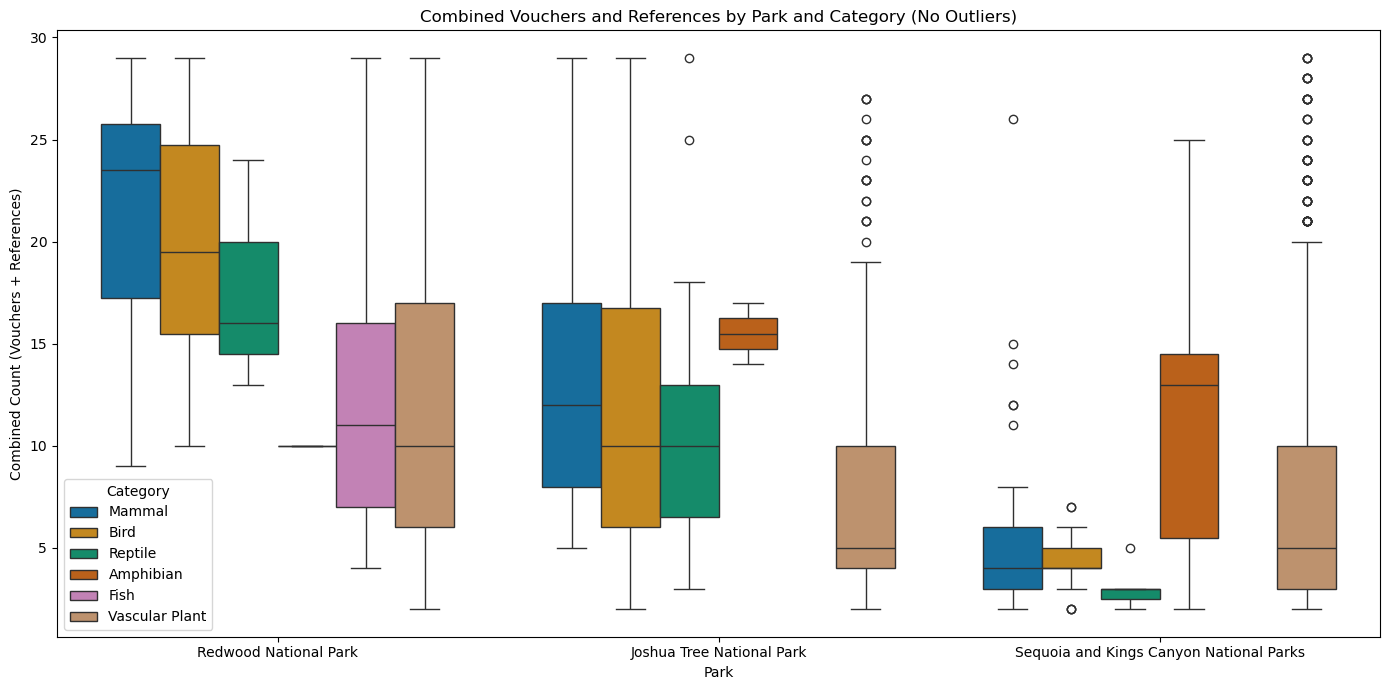

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a new column for the combined sum of vouchers and references
df['combined'] = df['Vouchers'] + df['References']

# Calculate IQR to identify outliers
Q1 = df['combined'].quantile(0.25)
Q3 = df['combined'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers (outside 1.5 * IQR range)
df_no_outliers = df[(df['combined'] >= (Q1 - 1.5 * IQR)) & (df['combined'] <= (Q3 + 1.5 * IQR))]

# Create the box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Park Name', y='combined', hue='Category', data=df_no_outliers, palette='colorblind')

# Add titles and labels
plt.title('Combined Vouchers and References by Park and Category (No Outliers)')
plt.xlabel('Park')
plt.ylabel('Combined Count (Vouchers + References)')


# Show the plot with tight layout to avoid clipping
plt.tight_layout()
plt.show()

plt.savefig('boxplot.png', format='png')

# Close the plot to free up memory
plt.close()
